In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import mplfinance as fplt
import ast
import warnings
warnings.filterwarnings("ignore")


In [2]:
data=pd.read_csv("Data/BANKNIFTY_ATM_OI_PREMIUM_CHANGE_5MINS.csv",index_col=[0])
data

,DATE,datetime,OPEN,HIGH,LOW,CLOSE,VOLUME,ATM,next_datetime,CE_OI_0,...,call_premium_1,PE_OI_1,put_premium_1,CE_OI_chg,PE_OI_chg,call_premium_chg,put_premium_chg,CALL DECISION,PUT DECISION,SPOT DECISION
0,2018-01-01,2018-01-01 09:15:00,25566.40,25566.40,25496.60,25539.30,0,25500,2018-01-01 09:19:00,320720.0,...,136.50,344920.0,109.55,16080.0,22120.0,12.80,-7.90,call buying,put selling,1
1,2018-01-01,2018-01-01 09:20:00,25541.60,25588.00,25541.60,25563.70,0,25600,2018-01-01 09:24:00,264920.0,...,99.15,110000.0,151.35,21880.0,7200.0,-1.70,0.10,call selling,put buying,-1
2,2018-01-01,2018-01-01 09:25:00,25563.90,25566.90,25550.70,25551.70,0,25600,2018-01-01 09:29:00,286800.0,...,96.35,115120.0,152.20,8320.0,5120.0,-1.00,-0.80,call selling,put selling,0
3,2018-01-01,2018-01-01 09:30:00,25552.80,25556.60,25540.70,25545.80,0,25500,2018-01-01 09:34:00,353960.0,...,138.20,412960.0,110.75,-480.0,3960.0,-5.75,5.75,call buyer exit,put buying,-1
4,2018-01-01,2018-01-01 09:35:00,25545.50,25568.40,25538.80,25567.20,0,25600,2018-01-01 09:39:00,299480.0,...,97.10,123560.0,152.00,21720.0,2200.0,2.80,-4.55,call buying,put selling,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
118008,2024-05-31,2024-05-31 15:05:00,48919.65,48925.30,48845.10,48891.05,0,48900,2024-05-31 15:09:00,289845.0,...,1063.15,271905.0,906.85,-2235.0,-2715.0,-17.75,15.55,call buyer exit,put seller exit,-1
118009,2024-05-31,2024-05-31 15:10:00,48891.95,48974.70,48850.85,48966.10,0,49000,2024-05-31 15:14:00,1149330.0,...,1019.00,879135.0,927.85,-4170.0,-3495.0,26.95,-20.30,call seller exit,put buyer exit,1
118010,2024-05-31,2024-05-31 15:15:00,48966.30,49122.55,48964.15,49054.30,0,49100,2024-05-31 15:19:00,352860.0,...,979.85,292410.0,929.95,-67965.0,-12630.0,-14.45,16.85,call buyer exit,put seller exit,-1
118011,2024-05-31,2024-05-31 15:20:00,49056.35,49115.15,49028.80,49088.05,0,49100,2024-05-31 15:24:00,284895.0,...,1011.20,296880.0,904.50,-14010.0,4470.0,11.85,26.90,call seller exit,put buying,-1


In [4]:
def PlotSignals1(date):

    df=data[data.DATE==date]
    df.reset_index(drop=True,inplace=True)
    l=list(np.arange(16000,50000,500))
    df.rename(columns={"OPEN":"Open","HIGH":"High","LOW":"Low","CLOSE":"Close"},inplace=True)   
    buy_signal=[]
    sell_signal=[]

    for i in range(len(df)):
        buy_flag=0
        sell_flag=0
        for val in l:
            if (df.loc[i,"Low"] <= val <= df.loc[i,'High']) and (df.loc[i,"SPOT DECISION"]==1) :
                buy_signal.append(df.loc[i,"Close"])
                buy_flag=1
                break
            elif (df.loc[i,"Low"] <= val <= df.loc[i,'High']) and (df.loc[i,"SPOT DECISION"]==-1) :
                sell_signal.append(df.loc[i,"Close"])
                sell_flag=1
                break
        if buy_flag==0:
            buy_signal.append(np.nan)
        if sell_flag==0:
            sell_signal.append(np.nan)
    df['Buy_signal']=buy_signal
    df['Sell_signal']=sell_signal
    df.index=pd.to_datetime(df.datetime)

    # print(df)
    df.to_csv("DF_OI_SIGNALS.csv")
    if buy_signal==[np.nan]*len(df) and sell_signal==[np.nan]*len(df):
        plot_flag=0
    elif buy_signal==[np.nan]*len(df) and sell_signal!=[np.nan]*len(df):
        plot_flag=1
        apds = [fplt.make_addplot(df["Sell_signal"],type='scatter',markersize=200,marker='v',color='red')] 
    elif buy_signal!=[np.nan]*len(df) and sell_signal==[np.nan]*len(df):
        plot_flag=1
        apds = [fplt.make_addplot(df["Buy_signal"],type='scatter',markersize=200,marker='^',color='green')] 
    else:
        plot_flag=1
        apds = [fplt.make_addplot(df["Sell_signal"],type='scatter',markersize=200,marker='v',color='red'),
                fplt.make_addplot(df["Buy_signal"],type='scatter',markersize=200,marker='^',color='green')
                ]   
    if plot_flag==1:
        fig,axes=fplt.plot(
                    df,
                    type='candle',
                    style='charles',
                    figsize =(20,7),
                    title='BANKNIFTY {}'.format(date),
                    ylabel='Price (Rs.)',
                    addplot=apds, returnfig=True
                    )
        ax2 = axes[1]
        ax2.set_ylim(0,max(df['High']))
        ax2.set_ylabel("Price")

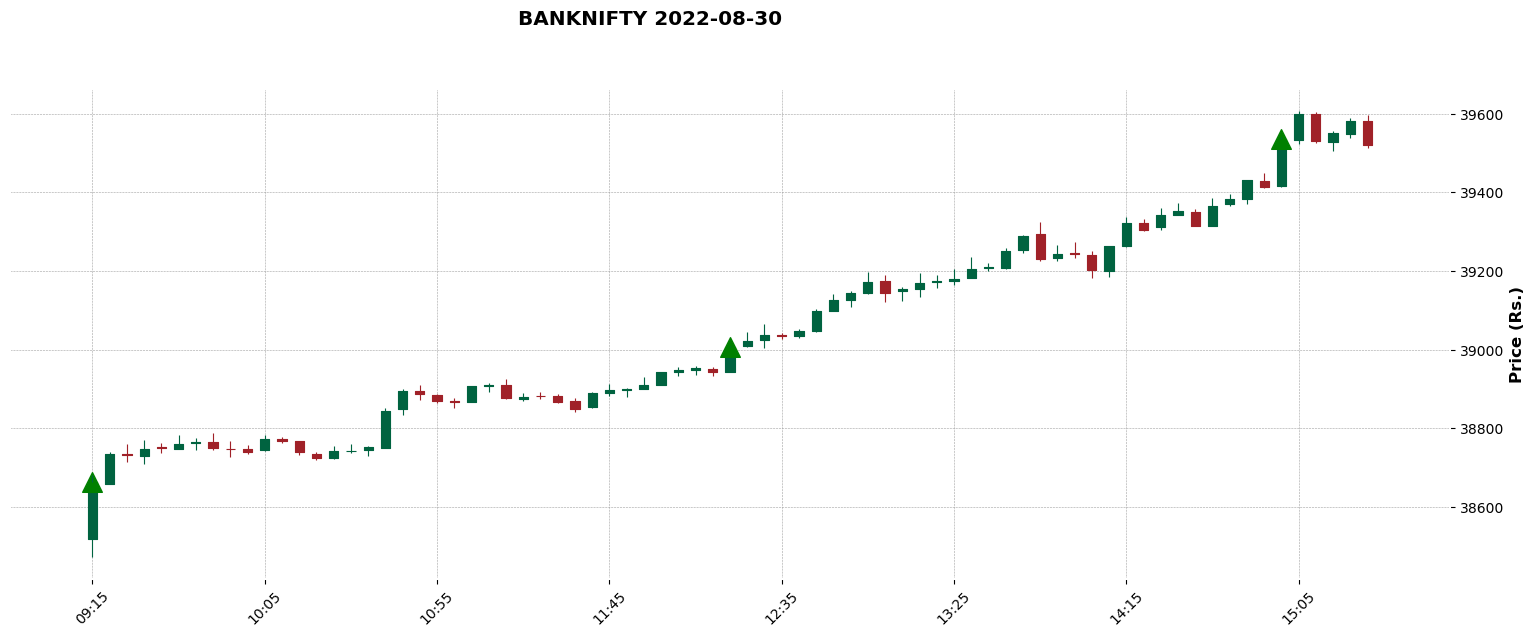

In [5]:
PlotSignals1("2022-08-30")

In [9]:
banknifty_minute_data=pd.read_csv("Data/BANKNIFTY_1.csv",index_col=[0])
banknifty_minute_data['DATETIME']=banknifty_minute_data['DATE']+" "+banknifty_minute_data['TIME']
banknifty_minute_data

,ASSET,DATE,TIME,OPEN,HIGH,LOW,CLOSE,VOLUME,DATETIME
0,BANKNIFTY,2015-01-01,09:15:00,18706.95,18706.95,18665.55,18665.55,0,2015-01-01 09:15:00
1,BANKNIFTY,2015-01-01,09:16:00,18658.50,18660.10,18649.75,18660.10,0,2015-01-01 09:16:00
2,BANKNIFTY,2015-01-01,09:17:00,18659.00,18680.45,18656.90,18680.45,0,2015-01-01 09:17:00
3,BANKNIFTY,2015-01-01,09:18:00,18680.05,18685.00,18667.85,18667.85,0,2015-01-01 09:18:00
4,BANKNIFTY,2015-01-01,09:19:00,18665.75,18665.75,18654.55,18654.55,0,2015-01-01 09:19:00
...,...,...,...,...,...,...,...,...,...
745505,BANKNIFTY,2024-05-31,15:25:00,49090.40,49090.40,49048.35,49059.65,0,2024-05-31 15:25:00
745506,BANKNIFTY,2024-05-31,15:26:00,49060.75,49066.75,49028.50,49039.95,0,2024-05-31 15:26:00
745507,BANKNIFTY,2024-05-31,15:27:00,49044.55,49058.70,48967.00,48997.45,0,2024-05-31 15:27:00
745508,BANKNIFTY,2024-05-31,15:28:00,48997.85,49008.75,48937.45,48996.80,0,2024-05-31 15:28:00


In [11]:
banknifty_5minute_data=pd.read_csv("Data/niftybank_5minutes.csv")
banknifty_5minute_data

,DATE,datetime,OPEN,HIGH,LOW,CLOSE,VOLUME
0,2015-01-01,2015-01-01 09:15:00,18706.95,18706.95,18649.75,18654.55,0
1,2015-01-01,2015-01-01 09:20:00,18654.15,18691.70,18651.95,18689.90,0
2,2015-01-01,2015-01-01 09:25:00,18682.95,18685.60,18673.75,18685.05,0
3,2015-01-01,2015-01-01 09:30:00,18683.60,18686.35,18667.95,18667.95,0
4,2015-01-01,2015-01-01 09:35:00,18667.55,18667.55,18638.85,18660.35,0
...,...,...,...,...,...,...,...
147722,2024-05-31,2024-05-31 15:05:00,48919.65,48925.30,48845.10,48891.05,0
147723,2024-05-31,2024-05-31 15:10:00,48891.95,48974.70,48850.85,48966.10,0
147724,2024-05-31,2024-05-31 15:15:00,48966.30,49122.55,48964.15,49054.30,0
147725,2024-05-31,2024-05-31 15:20:00,49056.35,49115.15,49028.80,49088.05,0


In [127]:
df_high_prediction=pd.read_csv("Predictions/5MIN_HIGH_CLASSIFICATION.csv",index_col=[0])
df_low_prediction=pd.read_csv('Predictions/5MIN_LOW_CLASSIFICATION.csv',index_col=[0])

In [128]:
df_high_prediction

,Date,datetime,Actual class,Predicted class,Predicted probability
0,2018-04-02,2018-04-02 09:15:00,0.0,0.0,0.412667
1,2018-04-02,2018-04-02 09:20:00,0.0,0.0,0.053333
2,2018-04-02,2018-04-02 09:25:00,0.0,0.0,0.358667
3,2018-04-02,2018-04-02 09:30:00,0.0,0.0,0.165333
4,2018-04-02,2018-04-02 09:35:00,0.0,0.0,0.276000
...,...,...,...,...,...
113995,2024-05-31,2024-05-31 15:05:00,0.0,0.0,0.174667
113996,2024-05-31,2024-05-31 15:10:00,1.0,0.0,0.452000
113997,2024-05-31,2024-05-31 15:15:00,1.0,1.0,0.852000
113998,2024-05-31,2024-05-31 15:20:00,0.0,0.0,0.299333


In [130]:
from datetime import timedelta
def PlotSignals2(date):

    df_minutes=banknifty_minute_data[banknifty_minute_data.DATE==date]
    df_minutes.reset_index(drop=True,inplace=True)
    df_minutes.rename(columns={"OPEN":"Open","HIGH":"High","LOW":"Low","CLOSE":"Close"},inplace=True)   
    df_5minutes=banknifty_5minute_data[banknifty_5minute_data.DATE==date]
    df_5minutes.reset_index(drop=True,inplace=True)

    df_h=df_high_prediction[df_high_prediction.Date==date]
    df_h.reset_index(drop=True,inplace=True)

    df_l=df_low_prediction[df_low_prediction.Date==date]
    df_l.reset_index(drop=True,inplace=True)

    buy_signal=[np.nan]*5
    sell_signal=[np.nan]*5



    l=list(np.arange(16000,50000,500))

    for i in range(5,len(df_minutes)):
        
        buy_flag=0
        sell_flag=0
        
        if df_minutes.loc[i,'DATETIME'] in df_5minutes.datetime.values:

            dt_lag_5=str(pd.to_datetime(df_minutes.loc[i,"DATETIME"])-timedelta(minutes=5))

            ind_5=df_5minutes.index[df_5minutes.datetime==dt_lag_5][0]
            high=df_5minutes.loc[ind_5,"HIGH"]
            low=df_5minutes.loc[ind_5,"LOW"]

            for val in l:
                if (low <= val <= high):

                    ind_5_pred= df_h.index[df_h.datetime==df_minutes.loc[i,'DATETIME']][0]
                    if df_h.loc[ind_5_pred,"Predicted probability"] > 0.5 and df_l.loc[ind_5_pred,"Predicted probability"] > 0.5:
                        buy_flag=1
                        buy_signal.append(df_minutes.loc[i,"Close"])
                        break
                    elif df_h.loc[ind_5_pred,"Predicted probability"] < 0.5 and df_l.loc[ind_5_pred,"Predicted probability"] < 0.5:
                        sell_flag=1
                        sell_signal.append(df_minutes.loc[i,"Close"])
                        break
            if buy_flag==0:
                buy_signal.append(np.nan)
            if sell_flag==0:
                sell_signal.append(np.nan)
        else:
            buy_signal.append(np.nan)
            sell_signal.append(np.nan)

    
    df_minutes.index=pd.to_datetime(df_minutes.DATETIME)

    df_minutes['Buy_signal']=buy_signal
    df_minutes['Sell_signal']=sell_signal
    # print(df_minutes)
    df_minutes.to_csv("DF_OI_SIGNALS.csv")
    if buy_signal==[np.nan]*len(df_minutes) and sell_signal==[np.nan]*len(df_minutes):
        plot_flag=0
    elif buy_signal==[np.nan]*len(df_minutes) and sell_signal!=[np.nan]*len(df_minutes):
        plot_flag=1
        apds = [fplt.make_addplot(df_minutes["Sell_signal"],type='scatter',markersize=200,marker='v',color='red')] 
    elif buy_signal!=[np.nan]*len(df_minutes) and sell_signal==[np.nan]*len(df_minutes):
        plot_flag=1
        apds = [fplt.make_addplot(df_minutes["Buy_signal"],type='scatter',markersize=200,marker='^',color='green')] 
    else:
        plot_flag=1
        apds = [fplt.make_addplot(df_minutes["Sell_signal"],type='scatter',markersize=200,marker='v',color='red'),
                fplt.make_addplot(df_minutes["Buy_signal"],type='scatter',markersize=200,marker='^',color='green')
                ]   
    if plot_flag==1:
        fig,axes=fplt.plot(
                    df_minutes,
                    type='candle',
                    style='charles',
                    figsize =(20,7),
                    title='BANKNIFTY {}'.format(date),
                    ylabel='Price (Rs.)',
                    addplot=apds, returnfig=True
                    )
        ax2 = axes[1]
        ax2.set_ylim(0,max(df_minutes['High']))
        ax2.set_ylabel("Price")
        return fig,axes

In [137]:
from matplotlib.backends.backend_pdf import PdfPages # type: ignore
with PdfPages('SignalPlots2019.pdf') as filename:
    for date in banknifty_minute_data.DATE.unique():
        if date >= '2019-01-01' and date<= '2019-12-31':
            try:
                fig,axes=PlotSignals2(date)
                filename.savefig(fig)
                plt.close(fig)
            except:
                pass
